The dataset contains various attributes on residential homes in Ames, Iowa, USA, along with the prices for which they were sold.

The source of the data: https://openml.org

The dataset contains the following columns:

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageArea: Size of garage in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

PoolArea: Pool area in square feet

YrSold: Year Sold (YYYY)

SalePrice: the price of the house (target)

Perform EDA and suggest what transformation steps might be necessary before a predictive model of house prices can be developed.



In [725]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(palette="Set2")

In [726]:
# load the data set and display information on its columns
df = pd.read_csv("ames_housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1418 non-null   object 
 1   LotArea        1417 non-null   float64
 2   Street         1406 non-null   object 
 3   Utilities      1414 non-null   object 
 4   OverallCond    1417 non-null   float64
 5   YearBuilt      1418 non-null   float64
 6   TotalBsmtSF    1417 non-null   float64
 7   GrLivArea      1412 non-null   float64
 8   FullBath       1411 non-null   float64
 9   HalfBath       1414 non-null   float64
 10  BedroomAbvGr   1405 non-null   float64
 11  KitchenAbvGr   1418 non-null   float64
 12  TotRmsAbvGrd   1423 non-null   float64
 13  GarageArea     1410 non-null   float64
 14  OpenPorchSF    1426 non-null   float64
 15  EnclosedPorch  1409 non-null   float64
 16  PoolArea       1421 non-null   float64
 17  YrSold         1422 non-null   float64
 18  SalePric

# Train-test split

Split the data into the training and test parts, using 20% for testing. Use random sampling.

In [727]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

1168 train and 292 test instances


<Axes: xlabel='SalePrice_cat'>

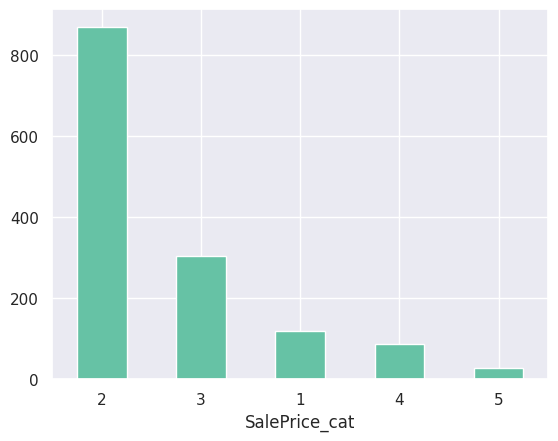

In [728]:
df["SalePrice_cat"] = pd.cut(df["SalePrice"], bins=[0., 100000., 200000., 300000., 400000., np.inf],
                          labels=[1, 2, 3, 4, 5])

df["SalePrice_cat"].value_counts()

df["SalePrice_cat"].value_counts().plot(kind="bar", rot=0)

In [729]:
mode_val = df["SalePrice_cat"].mode()[0]
df["SalePrice_cat"] = df["SalePrice_cat"].fillna(mode_val)

strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=7,
                                                  stratify=df["SalePrice_cat"])

In [730]:
def SalePrice_cat_proportions(data):
    return data["SalePrice_cat"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": SalePrice_cat_proportions(df),
    "Random test set": SalePrice_cat_proportions(rand_test_set),
    "Stratified test set": SalePrice_cat_proportions(strat_test_set),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
SalePrice_cat,,,,,
1,0.081507,0.078767,0.082192,-3.361345,0.840336
2,0.632192,0.609589,0.633562,-3.575298,0.216685
3,0.208219,0.219178,0.208904,5.263158,0.328947
4,0.059589,0.068493,0.058219,14.942529,-2.298851
5,0.018493,0.023973,0.017123,29.629630,-7.407407


In [731]:
del strat_train_set["SalePrice_cat"]
del strat_test_set["SalePrice_cat"]

In [732]:
# for convenience, rename the variables to shorter names:
trainset = strat_train_set
testset = strat_test_set

In [733]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1278 to 796
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1131 non-null   object 
 1   LotArea        1133 non-null   float64
 2   Street         1123 non-null   object 
 3   Utilities      1131 non-null   object 
 4   OverallCond    1133 non-null   float64
 5   YearBuilt      1131 non-null   float64
 6   TotalBsmtSF    1132 non-null   float64
 7   GrLivArea      1131 non-null   float64
 8   FullBath       1131 non-null   float64
 9   HalfBath       1130 non-null   float64
 10  BedroomAbvGr   1123 non-null   float64
 11  KitchenAbvGr   1134 non-null   float64
 12  TotRmsAbvGrd   1137 non-null   float64
 13  GarageArea     1125 non-null   float64
 14  OpenPorchSF    1139 non-null   float64
 15  EnclosedPorch  1126 non-null   float64
 16  PoolArea       1134 non-null   float64
 17  YrSold         1142 non-null   float64
 18  SalePrice  

In [734]:
trainset.describe()

,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,YrSold,SalePrice
count,1133.000000,1133.000000,1131.000000,1132.000000,1131.000000,1131.000000,1130.000000,1123.000000,1134.000000,1137.000000,1125.000000,1139.000000,1126.000000,1134.000000,1142.000000,1129.000000
mean,10504.830538,5.560459,1971.968170,1048.980565,1500.545535,1.563218,0.376106,2.853963,1.044092,6.474055,473.596444,46.794557,21.353464,1.610229,2007.838004,181695.505757
std,10655.092615,1.121233,30.265797,406.991669,506.523136,0.555129,0.499029,0.813243,0.217900,1.609688,211.616829,65.370271,60.134526,31.659370,1.323631,79659.213108
min,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7558.000000,5.000000,1955.000000,795.000000,1125.000000,1.000000,0.000000,2.000000,1.000000,5.000000,336.000000,0.000000,0.000000,0.000000,2007.000000,130000.000000
50%,9405.000000,5.000000,1974.000000,992.000000,1456.000000,2.000000,0.000000,3.000000,1.000000,6.000000,480.000000,26.000000,0.000000,0.000000,2008.000000,165000.000000
75%,11526.000000,6.000000,2001.000000,1284.500000,1767.500000,2.000000,1.000000,3.000000,1.000000,7.000000,576.000000,68.500000,0.000000,0.000000,2009.000000,214000.000000
max,215245.000000,9.000000,2010.000000,3138.000000,4676.000000,3.000000,2.000000,8.000000,3.000000,14.000000,1356.000000,523.000000,552.000000,738.000000,2010.000000,755000.000000


# Univariate analysis

## Distribution of categorical variables

In [735]:
trainset['MSZoning'].value_counts()

,count
MSZoning,
RL,889
RM,169
FV,52
RH,13
C (all),8


<Axes: xlabel='MSZoning'>

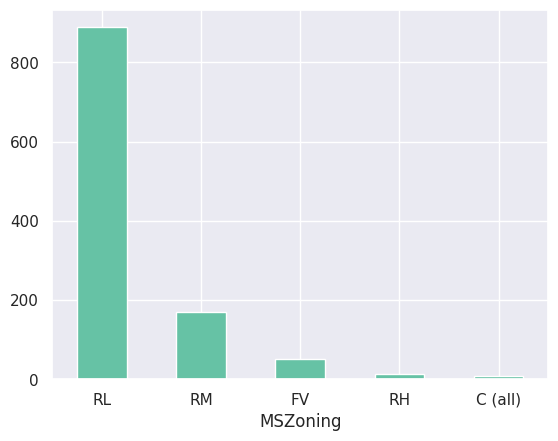

In [736]:
trainset['MSZoning'].value_counts().plot(kind="bar", rot=0)

## Distribution of numerical variables

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'OpenPorchSF'}>],
       [<Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

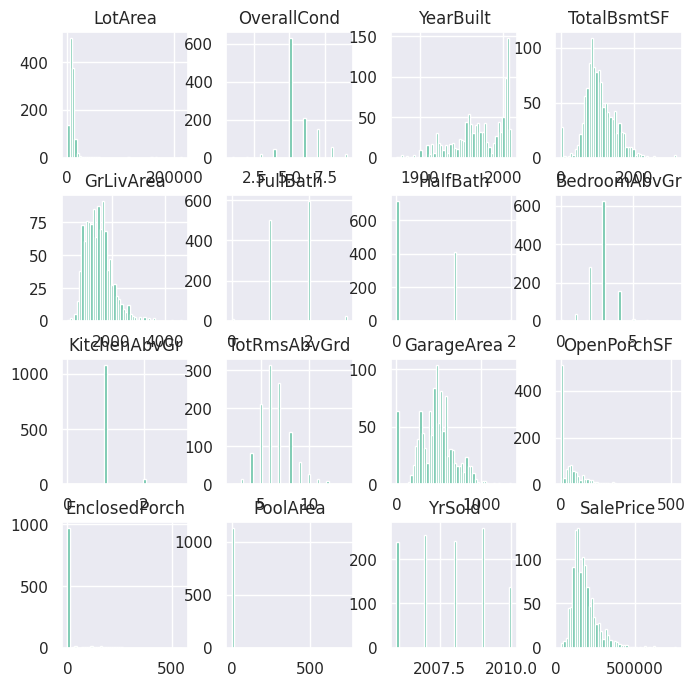

In [737]:
trainset.hist(bins=50, figsize=(8,8))

In [738]:
trainset["SalePrice"].sort_values(ascending=False)

,SalePrice
691,755000.0
1169,625000.0
898,611657.0
803,582933.0
1046,556581.0
...,...
1272,NaN
918,NaN
622,NaN
512,NaN


# Bivariate analysis

## Correlation matrix

In [739]:
corr_matrix = trainset.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,YrSold,SalePrice
LotArea,1.000,0.003,0.014,0.228,0.240,0.111,0.010,0.105,-0.022,0.172,0.156,0.050,-0.019,0.037,0.001,0.263
OverallCond,0.003,1.000,-0.355,-0.162,-0.098,-0.186,-0.093,0.007,-0.086,-0.072,-0.117,-0.034,0.057,0.013,0.024,-0.072
YearBuilt,0.014,-0.355,1.000,0.400,0.205,0.463,0.249,-0.075,-0.174,0.085,0.480,0.199,-0.365,-0.027,-0.009,0.535
TotalBsmtSF,0.228,-0.162,0.400,1.000,0.414,0.311,-0.073,0.079,-0.036,0.277,0.471,0.220,-0.123,-0.005,-0.010,0.634
GrLivArea,0.240,-0.098,0.205,0.414,1.000,0.639,0.407,0.519,0.106,0.826,0.488,0.291,-0.004,0.062,-0.025,0.714
FullBath,0.111,-0.186,0.463,0.311,0.639,1.000,0.125,0.348,0.119,0.537,0.431,0.266,-0.121,0.012,-0.028,0.565
HalfBath,0.010,-0.093,0.249,-0.073,0.407,0.125,1.000,0.195,-0.073,0.318,0.171,0.176,-0.076,-0.039,0.013,0.269
BedroomAbvGr,0.105,0.007,-0.075,0.079,0.519,0.348,0.195,1.000,0.201,0.677,0.101,0.075,0.040,0.053,-0.048,0.163
KitchenAbvGr,-0.022,-0.086,-0.174,-0.036,0.106,0.119,-0.073,0.201,1.000,0.270,-0.033,-0.064,0.011,-0.010,0.015,-0.134
TotRmsAbvGrd,0.172,-0.072,0.085,0.277,0.826,0.537,0.318,0.677,0.270,1.000,0.359,0.212,0.000,0.029,-0.036,0.522


## Scatter matrix

array([[<Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='FullBath', ylabel='GrLivArea'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>],
       [<Axes: xlabel='GrLivArea', ylabel='GarageArea'>,
        <Axes: xlabel='GarageArea', ylabel='GarageArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GarageArea'>,
        <Axes: xlabel='FullBath', ylabel='GarageArea'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='GarageArea'>],
       [<Axes: xlabel='GrLivArea', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='GarageArea', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='FullBath', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='TotalBsmtSF'>],
       [<Axes: xlabel='GrLivArea', ylabel='FullBath'>,
        <Axes: xlabel='GarageArea', ylabel='FullBath'>,
        <Axes: x

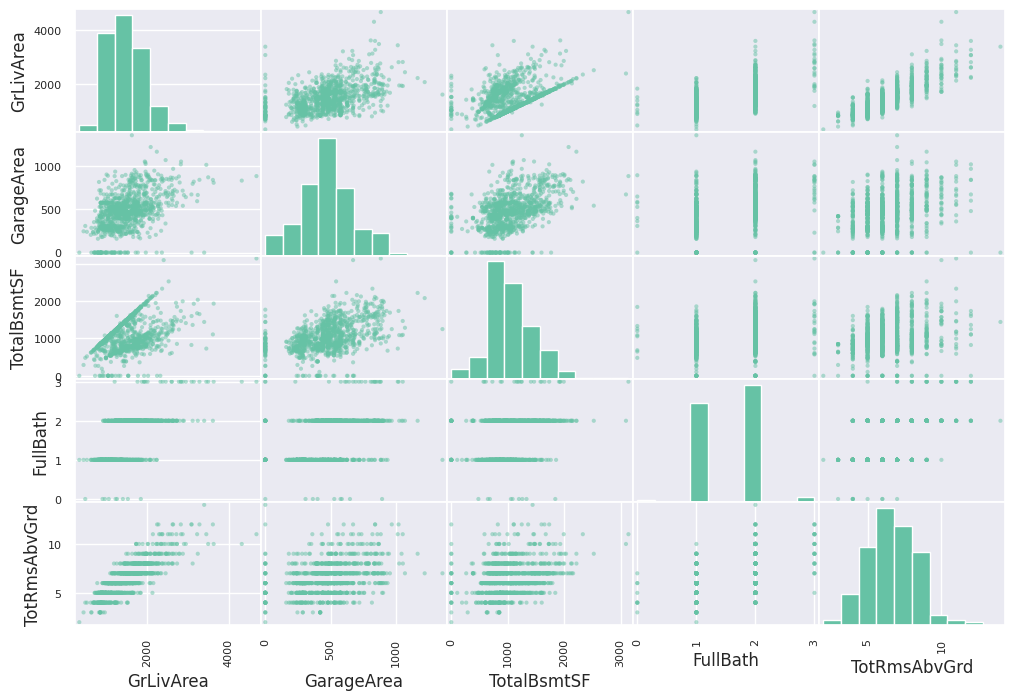

In [740]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
vars = ["GrLivArea", "GarageArea", "TotalBsmtSF", "FullBath", "TotRmsAbvGrd"]
scatter_matrix(trainset[vars], figsize=(12, 8))

## Correlations with the target variable

In [741]:
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
GrLivArea,0.714187
GarageArea,0.651322
TotalBsmtSF,0.634060
FullBath,0.564975
YearBuilt,0.535057
TotRmsAbvGrd,0.521881
OpenPorchSF,0.296705
HalfBath,0.268730
LotArea,0.263253
